In [1]:
import torch
from torch.utils.data import DataLoader, Dataset, SequentialSampler, RandomSampler,TensorDataset
from transformers import  RobertaConfig, RobertaModel, RobertaTokenizer
import argparse
import json
import os
from model2 import Model
from torch.utils.data import DataLoader, Dataset, SequentialSampler, RandomSampler,TensorDataset
import random
import multiprocessing
from tqdm import tqdm, trange
import numpy as np
import javalang
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
np.random.seed(0)
import seaborn as sns
import collections
import pickle
import sklearn
from matplotlib import cm
from sklearn import manifold

sns.set_style("darkgrid")
BLACK = "k"
GREEN = "#59d98e"
SEA = "#159d82"
BLUE = "#3498db"
PURPLE = "#9b59b6"
GREY = "#95a5a6"
RED = "#e74c3c"
ORANGE = "#f39c12"
YELLOW = "#f1c40f"
GRAY = "#95a5a6"
BROWN = "#8e44ad"
CYAN = "#8e44ad"


/Users/jirigesi/anaconda3/envs/CodeBert/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
def get_data_points(head_data):
  xs, ys, avgs = [], [], []
  for layer in range(12):
    for head in range(12):
      ys.append(head_data[layer][head])
      xs.append(1 + layer)
    avgs.append(head_data[layer].mean())
  return xs, ys, avgs

def add_line(key, ax, color, label, plot_avgs=True):
  xs, ys, avgs = get_data_points(avg_attns[key])
  ax.scatter(xs, ys, s=12, label=label, color=color)
  if plot_avgs:
    ax.plot(1 + np.arange(len(avgs)), avgs, color=color)
  ax.legend(loc="best")
  ax.set_xlabel("Layer")
  ax.set_ylabel("Avg. Attention")

In [47]:
def calculate_avg(syntax_list, syntax_attention):
    avg_attns = {}
    for syntaxType in syntax_list:
        temp = []
        for instance in syntax_attention:
            a = np.array(instance[syntaxType])
            if a.shape[0] != 0:
                a = a.squeeze(0)
                a = a.mean(axis=2)
                temp.append(a)
        if len(temp) != 0:
            temp = np.array(temp)
            temp = temp.reshape(temp.shape[1], temp.shape[2], temp.shape[0])
            avg_temp = temp.mean(axis=2)
            avg_attns[syntaxType] = avg_temp
    return avg_attns

In [39]:
ast_syntax_list = ['else', 
                'if_statement', 
                'method_declaration', 
                'class_declaration', 
                'constructor_declaration',
                'return_statement']

In [40]:
syntax_list = ['annotation', 'basictype', 'boolean', 
                    'decimalinteger', 'identifier', 'keyword',
                    'modifier', 'operator', 'separator', 'null',
                    'string', 'decimalfloatingpoint']

In [48]:
# load pickled data
CD4DD = pickle.load(open("/Users/jirigesi/Desktop/results/attention_results/CD4DD_syntax_attention_weights.pkl", "rb"))
DD4CD = pickle.load(open("/Users/jirigesi/Desktop/results/attention_results/DD4CD_syntax_attention_weights.pkl", "rb"))

CT4CR = pickle.load(open("/Users/jirigesi/Desktop/results/attention_results/CT4CR_syntax_attention_weights.pkl", "rb"))
CR4CT = pickle.load(open("/Users/jirigesi/Desktop/results/attention_results/CR4CT_syntax_attention_weights.pkl", "rb"))


In [ ]:
CD4DD = calculate_avg(ast_syntax_list, CD4DD)
DD4CD = calculate_avg(ast_syntax_list, DD4CD)
CT4CR = calculate_avg(syntax_list, CT4CR)
CR4CT = calculate_avg(syntax_list, CR4CT)

In [62]:
avg_attns = {}
a = list(CD4DD.keys())
for key in a:
    avg_attns[key+'_CD4DD'] = CD4DD[key]
    avg_attns[key+'_DD4CD'] = DD4CD[key]
    avg_attns[key+'_CR4CT'] = CR4CT[key]
    avg_attns[key+'_CT4CR'] = CT4CR[key]

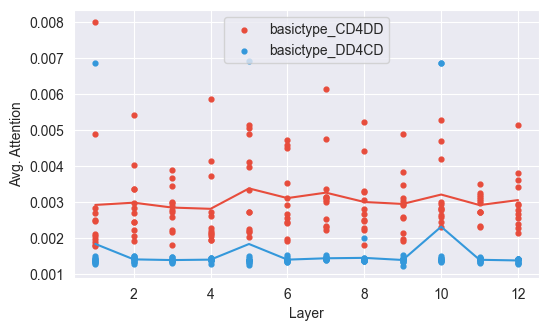

In [64]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("basictype_CD4DD", RED, "basictype_CD4DD"),
                           ("basictype_DD4CD", BLUE, "basictype_DD4CD")]:
  add_line(key, ax, color, label)

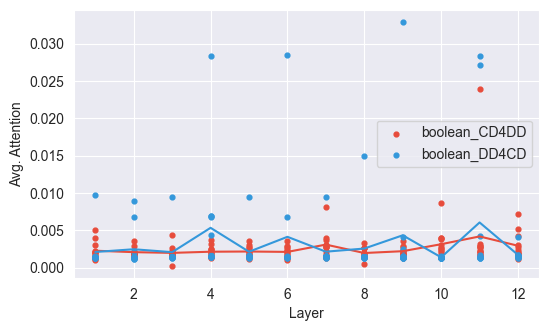

In [65]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("boolean_CD4DD", RED, "boolean_CD4DD"),
                           ("boolean_DD4CD", BLUE, "boolean_DD4CD")]:
  add_line(key, ax, color, label)

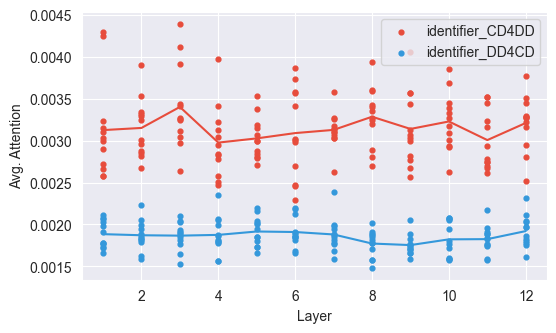

In [66]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("identifier_CD4DD", RED, "identifier_CD4DD"),
                           ("identifier_DD4CD", BLUE, "identifier_DD4CD")]:
  add_line(key, ax, color, label)

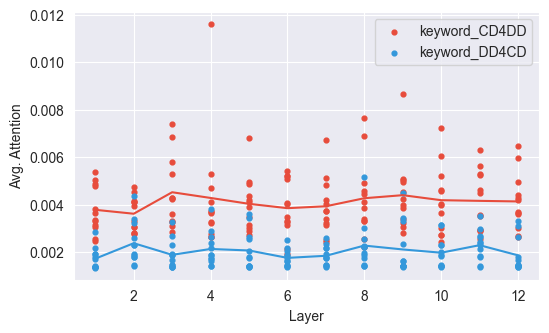

In [67]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("keyword_CD4DD", RED, "keyword_CD4DD"),
                           ("keyword_DD4CD", BLUE, "keyword_DD4CD")]:
  add_line(key, ax, color, label)

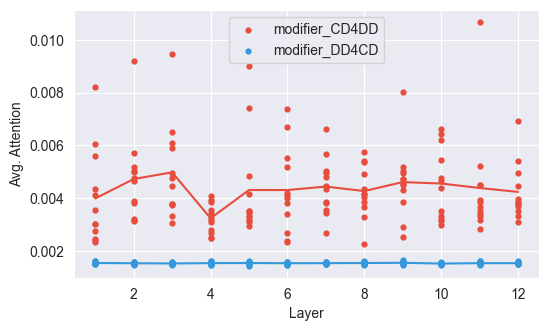

In [68]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("modifier_CD4DD", RED, "modifier_CD4DD"),
                           ("modifier_DD4CD", BLUE, "modifier_DD4CD")]:
  add_line(key, ax, color, label)

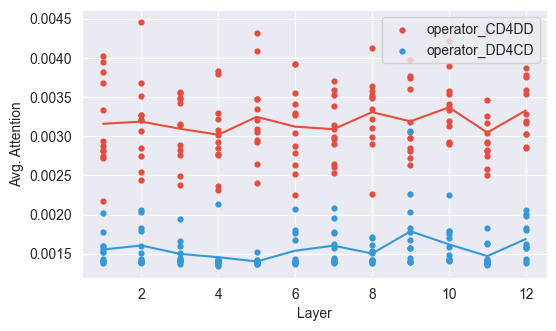

In [69]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("operator_CD4DD", RED, "operator_CD4DD"),
                           ("operator_DD4CD", BLUE, "operator_DD4CD")]:
  add_line(key, ax, color, label)

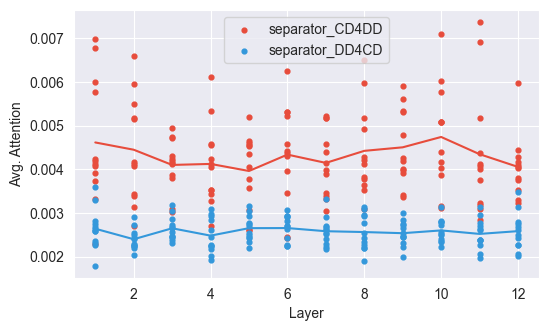

In [70]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("separator_CD4DD", RED, "separator_CD4DD"),
                           ("separator_DD4CD", BLUE, "separator_DD4CD")]:
  add_line(key, ax, color, label)

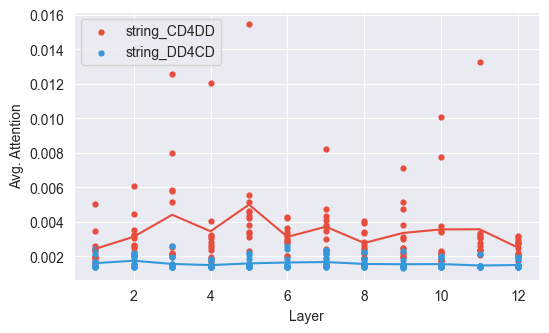

In [72]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("string_CD4DD", RED, "string_CD4DD"),
                           ("string_DD4CD", BLUE, "string_DD4CD")]:
  add_line(key, ax, color, label)

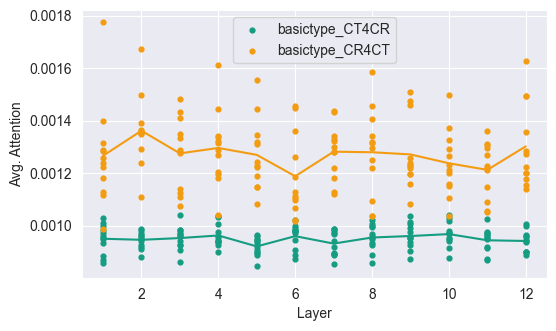

In [73]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("basictype_CT4CR", SEA, "basictype_CT4CR"),
                           ("basictype_CR4CT", ORANGE, "basictype_CR4CT")]:
  add_line(key, ax, color, label)

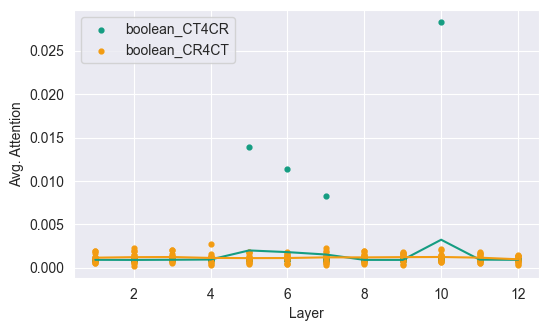

In [74]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("boolean_CT4CR", SEA, "boolean_CT4CR"),
                           ("boolean_CR4CT", ORANGE, "boolean_CR4CT")]:
  add_line(key, ax, color, label)

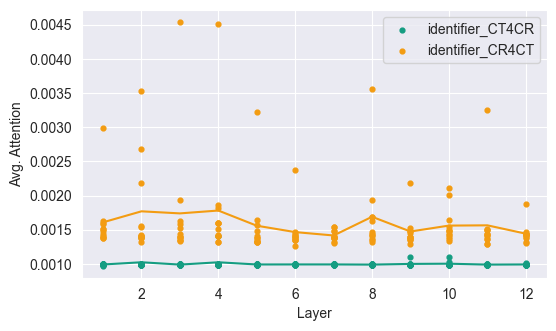

In [75]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("identifier_CT4CR", SEA, "identifier_CT4CR"),
                           ("identifier_CR4CT", ORANGE, "identifier_CR4CT")]:
  add_line(key, ax, color, label)

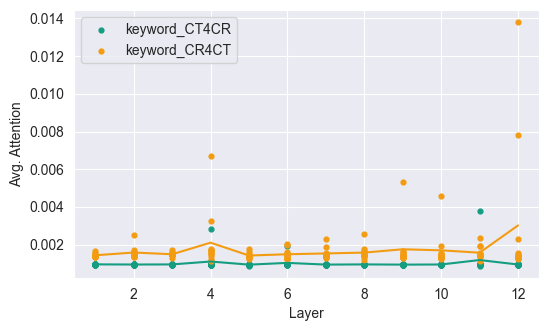

In [76]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("keyword_CT4CR", SEA, "keyword_CT4CR"),
                           ("keyword_CR4CT", ORANGE, "keyword_CR4CT")]:
  add_line(key, ax, color, label)

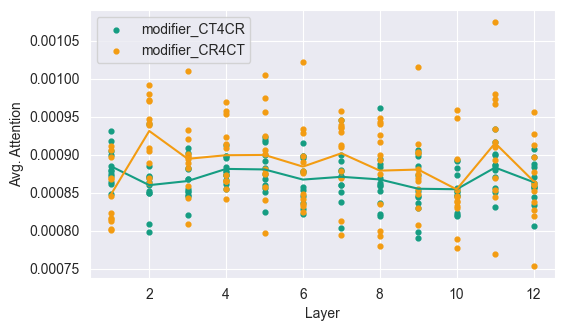

In [77]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("modifier_CT4CR", SEA, "modifier_CT4CR"),
                           ("modifier_CR4CT", ORANGE, "modifier_CR4CT")]:
  add_line(key, ax, color, label)

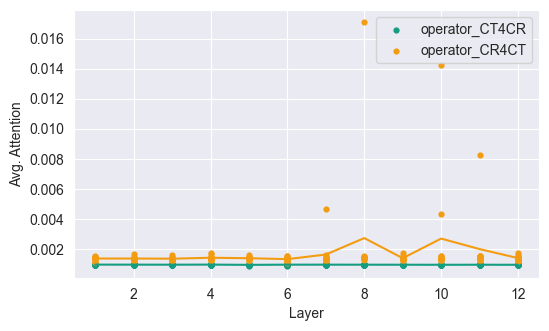

In [78]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("operator_CT4CR", SEA, "operator_CT4CR"),
                           ("operator_CR4CT", ORANGE, "operator_CR4CT")]:
  add_line(key, ax, color, label)

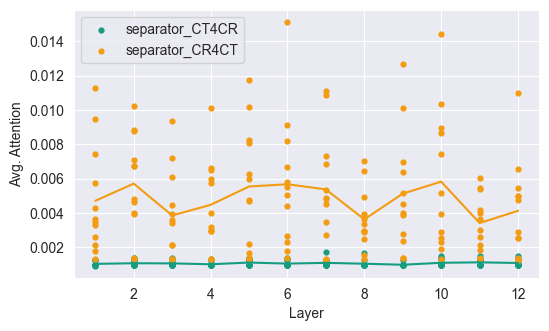

In [79]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("separator_CT4CR", SEA, "separator_CT4CR"),
                           ("separator_CR4CT", ORANGE, "separator_CR4CT")]:
  add_line(key, ax, color, label)

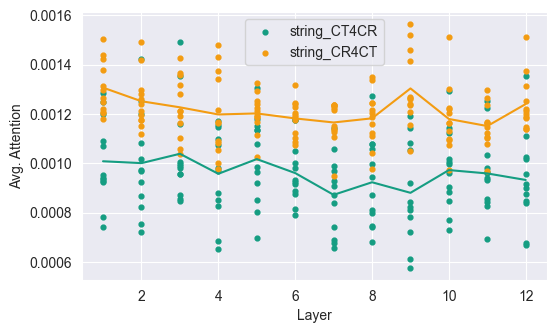

In [80]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("string_CT4CR", SEA, "string_CT4CR"),
                           ("string_CR4CT", ORANGE, "string_CR4CT")]:
  add_line(key, ax, color, label)